### Linear Regression Programming Assignment  

Hello, welcome to this programming assignment, In this programming assignment, we will be using linear regression to develop an end to end model, so that we can get hands on experience with linear regression, I will be not doing anything, you will be doing everything so that your model should be yours. 

This assignment is created by **Ayush Singh** Founder of - <a href="https://www.youtube.com/channel/UC_sl8H2k4xC9RLqyHsnDkcA" target="_blank">Newera</a> YT channel, He is a 14 year old Machine learning engineer and a data scientist and also Microsoft Certified Azure Artificial Intelligence Engineer and Microsoft Certified Azure Fundamentals. 

This programming assignment is a part of my <a href="https://www.youtube.com/playlist?list=PLITqwrDNk9XDyoAoVbXKbgRBMJK5NrQcB" target="_blank">FULL STACK MACHINE LEARNING COURSE</a>

The requirements for proceeding with this notebook, is that you should be comfortable with Linear Regression, if you're not check out <a href="https://www.youtube.com/watch?v=AMC0yC6mois&list=PLITqwrDNk9XDyoAoVbXKbgRBMJK5NrQcB&index=2&t=9s" target="_blank">This</a>video, which covers everything you need to mastery linear regression. 

In [82]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline 

from pandas.plotting import scatter_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error,mean_squared_error

### About the data  

This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels. 

you have to predict the output with the given inputs.

### load the data  
Data is in the form of xlsx, you have to read the data from pandas and column name should be "Frequency", "Angle of attack", "Chord length", "Free-stream velocity", "Displacement thickness", "Scaled sound pressure level" respective to the columns, you have to provide these column name when you're loading the data.  

**Instructions** 

- you will have to load the data and store the data in the variable. 
- After loading, you have to convert the data in the dataframe. 

**References**  

- <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html" target="_blank">Docs</a>

In [83]:
### load the data by removing this comment  ###  
data=pd.read_excel('Book1.xlsx')

In [84]:
### convert the data which you've loaded to the dataframe ### 
df=pd.DataFrame(data)
df.columns=["Frequency","Angle of Attack","Chord Length","Free-stream velocity","Suction side displacement thickness","Scaled sound pressure level"]
df

,Frequency,Angle of Attack,Chord Length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571
...,...,...,...,...,...,...
1497,2500,15.6,0.1016,39.6,0.052849,110.264
1498,3150,15.6,0.1016,39.6,0.052849,109.254
1499,4000,15.6,0.1016,39.6,0.052849,106.604
1500,5000,15.6,0.1016,39.6,0.052849,106.224


### Explore the data  

**Instructions** 

- you will see the head of the data. 
- you will see the shape of the data. 
- you will see the information using .info and .describe  
- Check for the missing values present in the data.  
- See the relations between the features. Hint [ Use .hist with data ] 


In [85]:
head_of_the_data =df.head()
head_of_the_data

,Frequency,Angle of Attack,Chord Length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571


In [86]:
shape_of_the_data = df.shape
shape_of_the_data

(1502, 6)

In [87]:
information_about_the_data_using_info = df.info()
information_about_the_data_using_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Frequency                            1502 non-null   int64  
 1   Angle of Attack                      1502 non-null   float64
 2   Chord Length                         1502 non-null   float64
 3   Free-stream velocity                 1502 non-null   float64
 4   Suction side displacement thickness  1502 non-null   float64
 5   Scaled sound pressure level          1502 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.5 KB


In [88]:
information_about_the_data_using_describe = df.describe()
information_about_the_data_using_describe

,Frequency,Angle of Attack,Chord Length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
count,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000,1502.000000
mean,2887.769640,6.786818,0.136436,50.847137,0.011146,124.835034
std,3153.162983,5.917509,0.093471,15.569029,0.013153,6.900864
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.190000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.719000
75%,4000.000000,9.900000,0.228600,71.300000,0.015840,129.997750
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [89]:
missing_values = df.isnull()
missing_values

,Frequency,Angle of Attack,Chord Length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1497,False,False,False,False,False,False
1498,False,False,False,False,False,False
1499,False,False,False,False,False,False
1500,False,False,False,False,False,False


array([[<AxesSubplot:title={'center':'Frequency'}>,
        <AxesSubplot:title={'center':'Angle of Attack'}>],
       [<AxesSubplot:title={'center':'Chord Length'}>,
        <AxesSubplot:title={'center':'Free-stream velocity'}>],
       [<AxesSubplot:title={'center':'Suction side displacement thickness'}>,
        <AxesSubplot:title={'center':'Scaled sound pressure level'}>]],
      dtype=object)

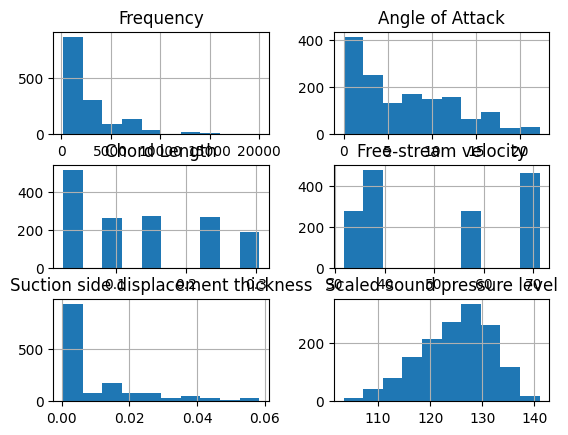

In [90]:
features_relations = df.hist()
features_relations

### See the correlations 

Now, we will make use of .corr() and we will take a look at the correlations with respect to the target variable.

In [91]:
corr_matrix = df.corr()
corr_matrix["Scaled sound pressure level"].sort_values(ascending=False) 

Scaled sound pressure level            1.000000
Free-stream velocity                   0.125003
Angle of Attack                       -0.156027
Chord Length                          -0.236657
Suction side displacement thickness   -0.312632
Frequency                             -0.390686
Name: Scaled sound pressure level, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation for eg(sound pressure tends to go up when Free-stream velocity increases) and this is opposite for negative correlation with respect to Scaled sound pressure level.

### Divide the Data 

In [92]:
X=df["Free-stream velocity"]
Y=df["Scaled sound pressure level"]

In [93]:
#### use the train_test_split function, with test_size = 0.1, random_state = 0 

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

### Model Development 

In [94]:
#### MAKE AN LINEAR REGRESSION OBJECT AND FIT THE MODEL USING "X_train", "y_train" 
X_train= X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
### START CODE HERE ### 
lr = LinearRegression()
### FIT YOUR MODEL HERE ### 
lr.fit(X_train,y_train)

### END CODE HERE ###

LinearRegression()

### Testing your model 

In [95]:
pred = lr.predict(X_test) 
print(pred[0])
print(y_test.values[0])

125.83196652829568
126.097


In [96]:
mae = mean_absolute_error(pred, y_test)
print("Mean Absolute Error :", round(mae, 5))

Mean Absolute Error : 5.09941


In [97]:
mse = mean_squared_error(pred, y_test)
print("Mean Squared Error :", round(mse, 5))

Mean Squared Error : 39.38098


### Congratulations for completing this assignment 

### Legal Stuff 

- You're not allowed to sell this notebook, if attempted, "Newera" will take legal action. but i know my viewers that my viewers are very honest.  

- This notebook is absolutely free for everyone.
